In [1]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
import pyproj
import folium
from datetime import datetime
from shapely.geometry import Point,Polygon
from pyproj import Proj, transform

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [3]:
boundary = gp.read_file("C:/Users/guswn/Downloads/xn--_-shp-wu9s511b22i5pu95dr8meqcdzb/dc6d83d7-c84e-48b8-b29e-34ce3b86bfa62020328-1-1osfhvj.te5a.shp",encoding='cp949')

In [5]:
seoul=gp.read_file("C:/Users/guswn/Downloads/SIG_202005/SIG.shp",encoding="utf-8")

In [6]:
seoul

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,b'c1dfb1b8',"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,b'bfebbbeab1b8',"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,b'bcbab5bfb1b8',"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,b'b1a4c1f8b1b8',"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,48870,Hamyang-gun,b'c7d4bee7b1ba',"POLYGON ((1017715.723 1751280.191, 1017761.619..."
246,48880,Geochang-gun,b'b0c5c3a2b1ba',"POLYGON ((1034571.593 1767759.812, 1034559.208..."
247,48890,Hapcheon-gun,b'c7d5c3b5b1ba',"POLYGON ((1054066.576 1759517.415, 1054101.450..."
248,50110,Jeju-si,b'c1a6c1d6bdc3',"MULTIPOLYGON (((874410.953 1480515.382, 874408..."


In [7]:
result = [item for item in seoul["SIG_ENG_NM"] if item[-2:] == 'gu']
str(result)

"['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu', 'Jung-gu', 'Seo-gu', 'Dong-gu', 'Yeongdo-gu', 'Busanjin-gu', 'Dongnae-gu', 'Nam-gu', 'Buk-gu', 'Haeundae-gu', 'Saha-gu', 'Geumjeong-gu', 'Gangseo-gu', 'Yeonje-gu', 'Suyeong-gu', 'Sasang-gu', 'Jung-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Suseong-gu', 'Dalseo-gu', 'Jung-gu', 'Dong-gu', 'Michuhol-gu', 'Yeonsu-gu', 'Namdong-gu', 'Bupyeong-gu', 'Gyeyang-gu', 'Seo-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Gwangsan-gu', 'Dong-gu', 'Jung-gu', 'Seo-gu', 'Yuseong-gu', 'Daedeok-gu', 'Jung-gu', 'Nam-gu', 'Dong-gu', 'Buk-gu']"

In [8]:
seoul=seoul.iloc[:25]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

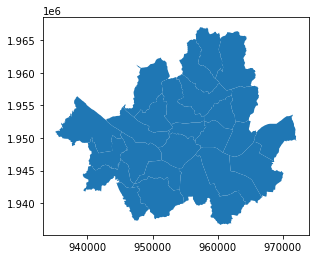

In [9]:
seoul.plot()


In [10]:
seoul = seoul.to_crs(epsg = 4326)

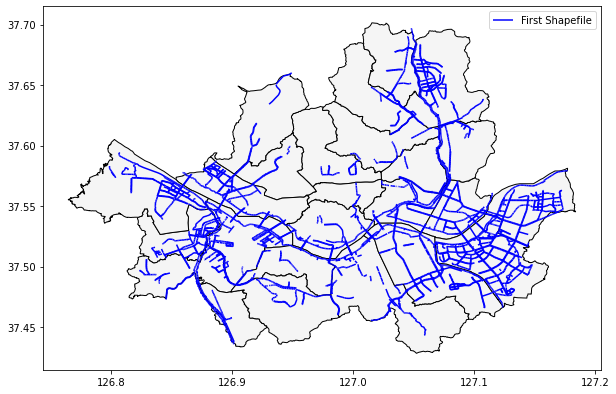

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

# 첫 번째 데이터를 그립니다.
boundary.plot(ax=ax, color='blue', label='First Shapefile')

# 두 번째 데이터를 그립니다.
seoul.plot(ax=ax, color='whitesmoke',edgecolor='black', linewidth=1, label='Second Shapefile')

# 'aspect' 매개변수를 수정합니다.
ax.set_aspect('equal')

# 범례를 추가합니다.
plt.legend()

# plot을 보여줍니다.
plt.show()

In [12]:
print(boundary.crs)
print(seoul.crs)

EPSG:4326
EPSG:4326


C:\Users\guswn\AppData\Local\Temp\ipykernel_15888\1754402207.py:8: UserWarning: The indices of the two GeoSeries are different.
  link_data_within_region = region_geometry.contains(boundary["geometry"])


TypeError: no numeric data to plot

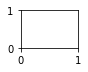

In [238]:
a = [i for i in range(1, 26)]

for i,reg in zip(a,seoul["SIG_ENG_NM"]):  
    ax = plt.subplot(5,5,i)
    region_name = reg  # 혹은 적절한 컬럼명으로 변경하세요.
    count=(seoul["SIG_ENG_NM"]==reg)
    region_geometry = seoul[count]["geometry"]
    link_data_within_region = region_geometry.contains(boundary["geometry"])
    link_data_within_region.plot(ax=ax, label=region_name)
    region_geometry.plot()
    ax.set_title(region_name)
    ax.set_aspect('equal')

# 그래픽 출력
plt.tight_layout()
plt.show()

filtered_coords = [point for point in linestring_coords if polygon.contains(Point(point))]

In [30]:
gulist = seoul['SIG_ENG_NM'].unique()

In [32]:
gulist

array(['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu',
       'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu',
       'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu',
       'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
      dtype=object)

In [240]:
sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))

C:\Users\guswn\AppData\Local\Temp\ipykernel_15888\4245913255.py:1: UserWarning: The indices of the two GeoSeries are different.
  sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))


0

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


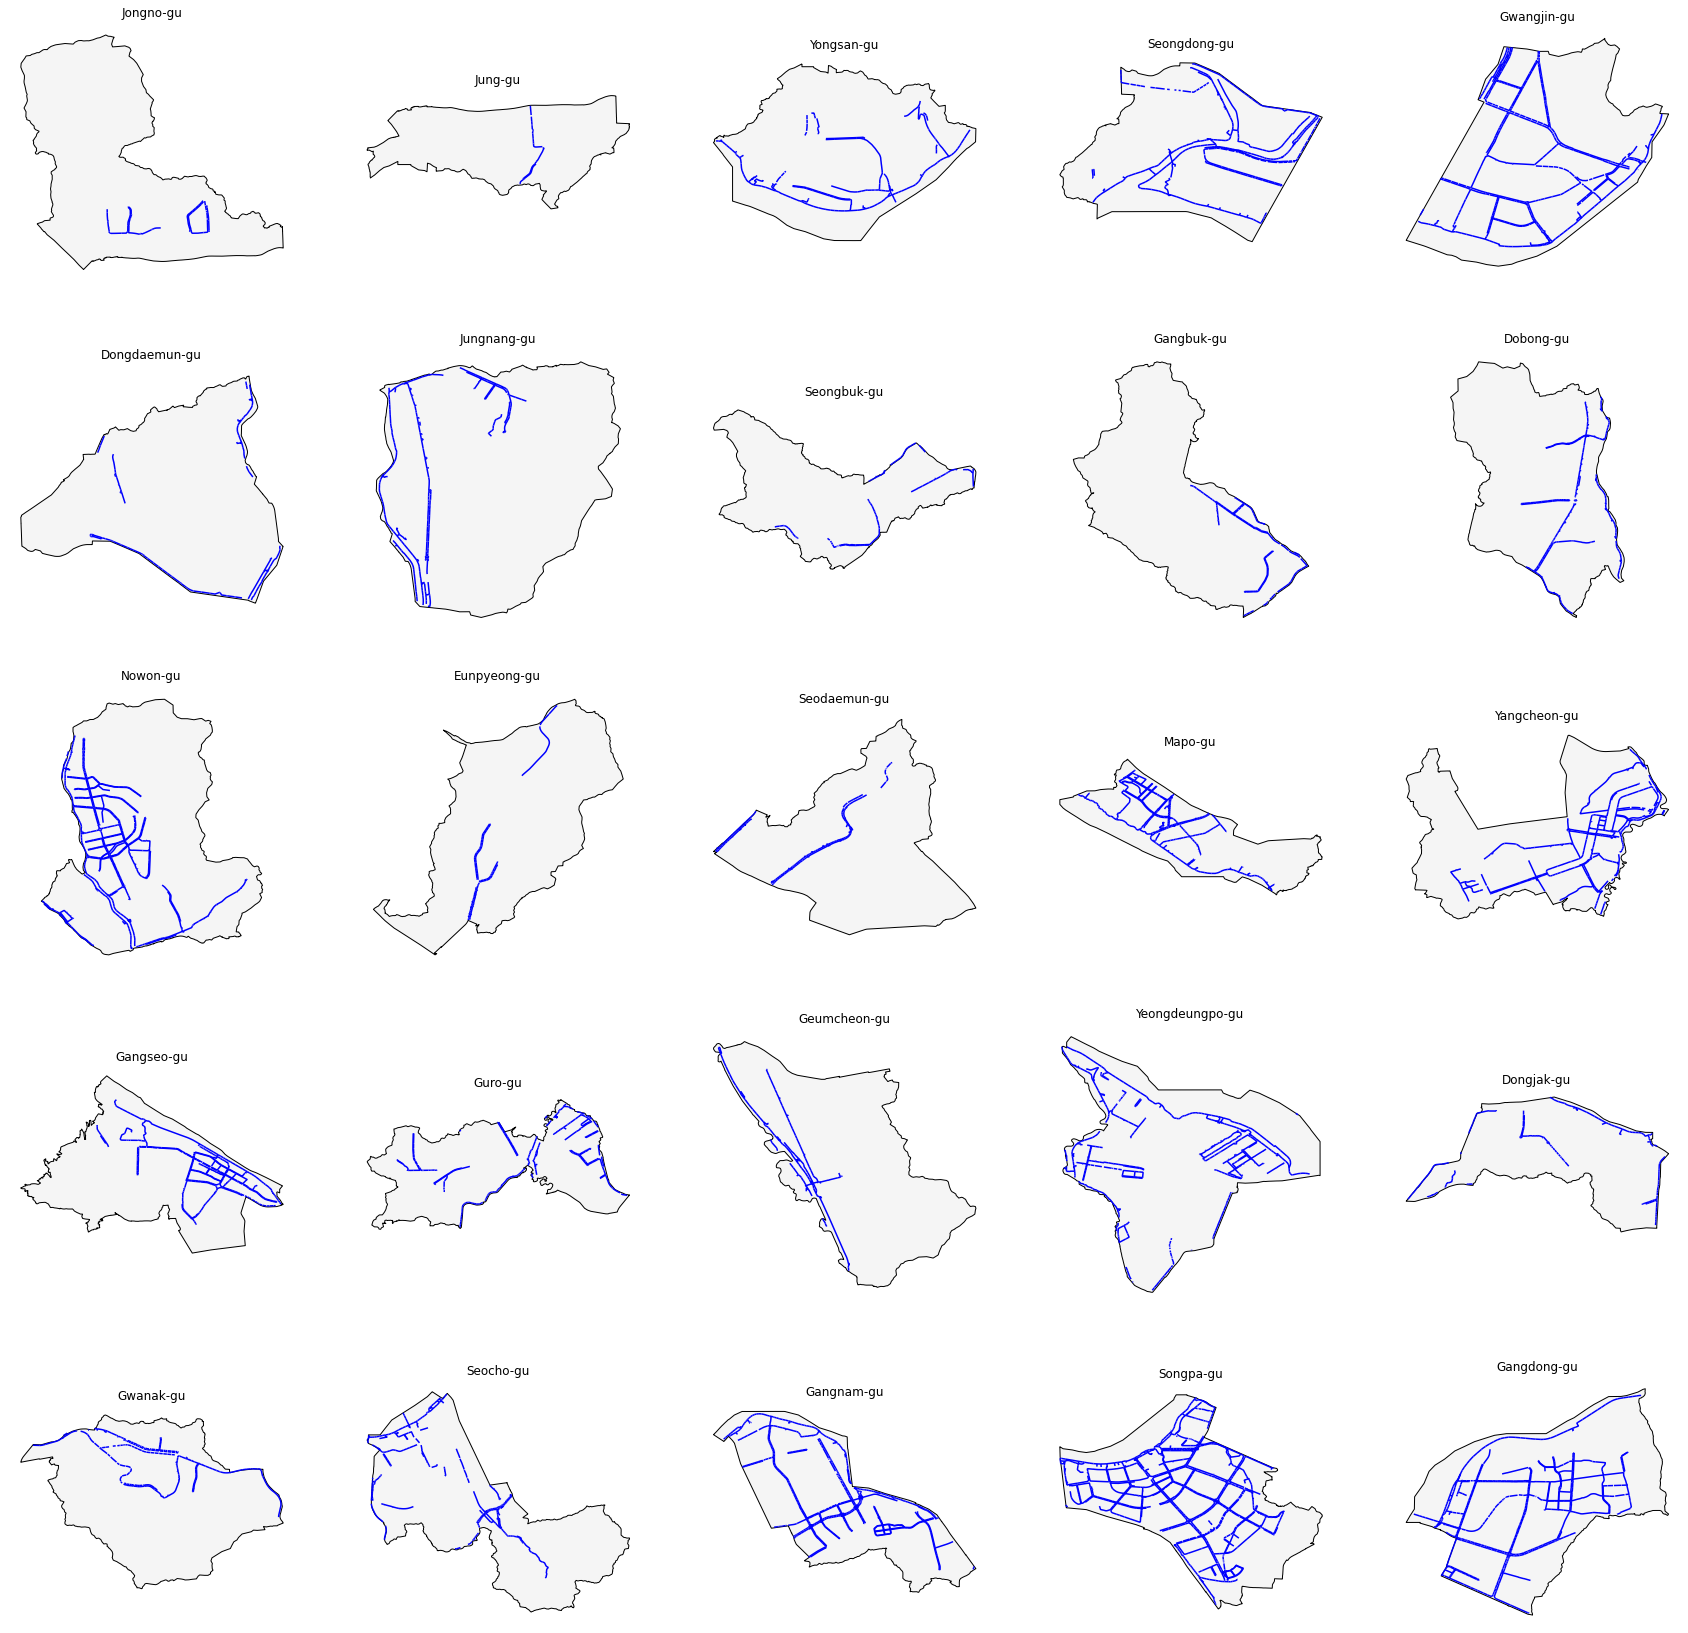

In [158]:
j = 1
plt.figure(figsize = (30,30))
for i in range(25):
    ax = plt.subplot(5,5,j)
    boundary[seoul["geometry"][i].contains(boundary["geometry"])].plot(ax=ax,color='blue')
    seoul.iloc[[i]].plot(figsize=(5,5),color='whitesmoke', edgecolor='black', linewidth=1, ax=ax)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(seoul["SIG_ENG_NM"][i])
    j = j+1
plt.show()

In [25]:
result=0
for i in range(len(seoul["geometry"])):
    result=result+sum(seoul["geometry"][i].contains(boundary["geometry"]))
result

12152

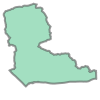

In [143]:
seoul["geometry"][0]

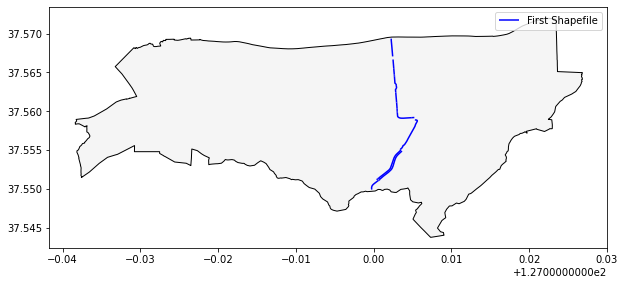

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
boundary[seoul["geometry"][1].contains(boundary["geometry"])].plot(ax=ax, color='blue', label='First Shapefile')
seoul[seoul["SIG_ENG_NM"]=='Jung-gu'].plot(ax=ax, color='whitesmoke',edgecolor='black', linewidth=1, label='Second Shapefile')
ax.set_aspect('equal')
plt.legend()
plt.show()

In [114]:
type(seoul["geometry"][3])

shapely.geometry.polygon.Polygon

In [156]:
seoul.iloc[[0]]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
